In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [2]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

In [3]:
amnts = ['1', '10', '100', '1000', '10000', '100000', '1000000']
cva_pref = '../cva_sine_result_files/final'
cva_suff = '_40_0_1.pkl'
cavia_pref = '../sine_result_files/final'
cavia_suff = '__1_25.pkl'
maml_pref = '../maml_sine_result_files/final'
maml_suff = '__1_25.pkl'
loggers = {
    'cva': {},
    'cavia': {},
    'maml': {}
}
for amnt in amnts:
    loggers['cva'][amnt] = get_logger(cva_pref + amnt + cva_suff)
    loggers['cavia'][amnt] = get_logger(cavia_pref + amnt + cavia_suff)
    loggers['maml'][amnt] = get_logger(maml_pref + amnt + maml_suff)

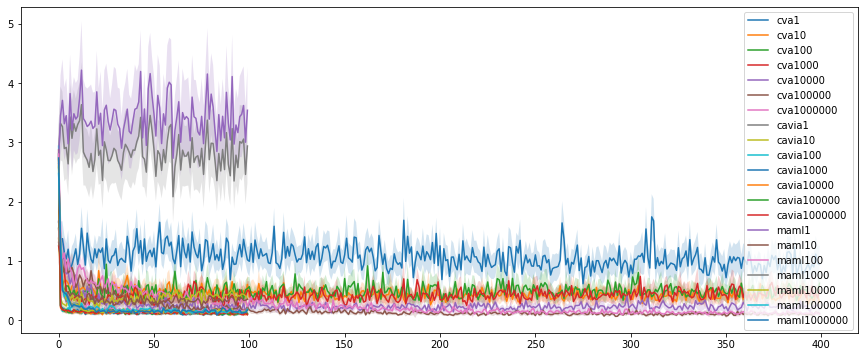

In [4]:
# plot the performance of everything
alpha = 0.2
for i, logger in loggers.items():
    for j, l in logger.items():
        x = [j for j in range(len(l.test_loss))]
        plt.plot(x, l.test_loss, label=i+j)
        plt.fill_between(x, l.test_loss+l.test_conf, l.test_loss-l.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.ylim(0,.5)
plt.show()

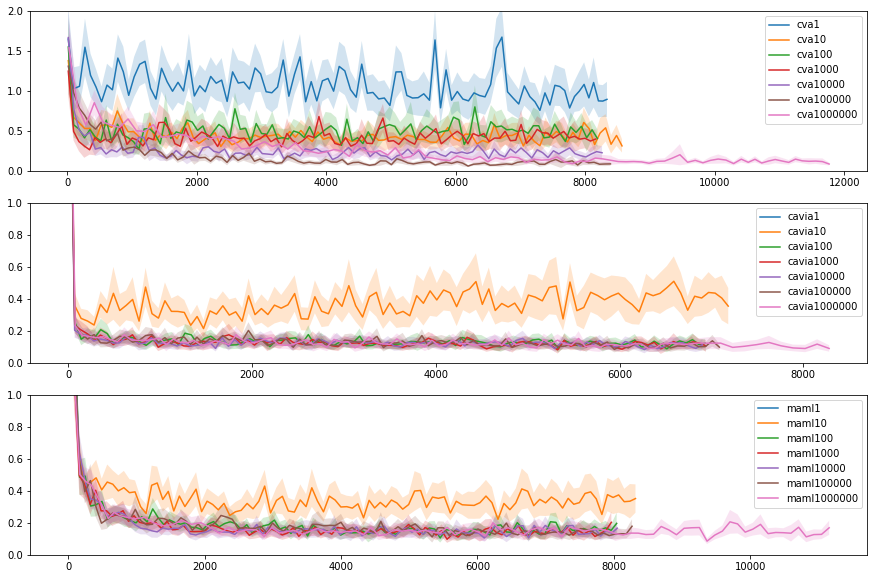

In [10]:
# performance vs time 
# plot each method on its own plot

plt.subplot(3, 1, 1)
s = 4
for i, l in loggers['cva'].items():
    x = l.elapsed_time[::s]
    plt.plot(x, l.test_loss[::s], label='cva'+i)
    plt.fill_between(x, l.test_loss[::s]+l.test_conf[::s], l.test_loss[::s]-l.test_conf[::s], alpha=alpha)
plt.legend()
plt.ylim(0,2)
    
plt.subplot(3, 1, 2)
for i, l in loggers['cavia'].items():
    x = l.elapsed_time
    plt.plot(x, l.test_loss, label='cavia'+i)
    plt.fill_between(x, l.test_loss+l.test_conf, l.test_loss-l.test_conf, alpha=alpha)
plt.legend()
plt.ylim(0,1)
    
plt.subplot(3, 1, 3)
for i, l in loggers['maml'].items():
    x = l.elapsed_time
    plt.plot(x, l.test_loss, label='maml'+i)
    plt.fill_between(x, l.test_loss+l.test_conf, l.test_loss-l.test_conf, alpha=alpha)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.ylim(0,1)
plt.show()

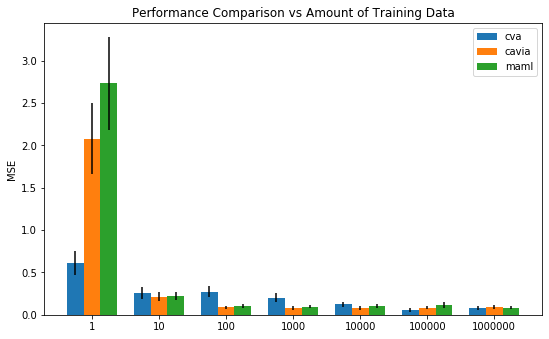

In [9]:
cva_mins, cva_stds, cavia_mins, cavia_stds, maml_mins, maml_stds = [], [], [], [], [], []
for amnt in amnts:
    idx = np.argmin(loggers['cva'][amnt].test_loss)
    cva_mins.append(loggers['cva'][amnt].test_loss[idx])
    cva_stds.append(loggers['cva'][amnt].test_conf[idx])
    idx = np.argmin(loggers['cavia'][amnt].test_loss)
    cavia_mins.append(loggers['cavia'][amnt].test_loss[idx])
    cavia_stds.append(loggers['cavia'][amnt].test_conf[idx])
    idx = np.argmin(loggers['maml'][amnt].test_loss)
    maml_mins.append(loggers['maml'][amnt].test_loss[idx])
    maml_stds.append(loggers['maml'][amnt].test_conf[idx])

xlabels = amnts
x = np.arange(len(xlabels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, cva_mins, width, label='cva', yerr=cva_stds)
rects2 = ax.bar(x, cavia_mins, width, label='cavia', yerr=cavia_stds)
rects3 = ax.bar(x+width, maml_mins, width, label='maml', yerr=maml_stds)
ax.set_ylabel('MSE')
ax.set_title('Performance Comparison vs Amount of Training Data')
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.legend() 
# plt.ylim(0, 1)

fig.tight_layout()

fig = plt.gcf()
fig.set_size_inches(8,5)

plt.show() 

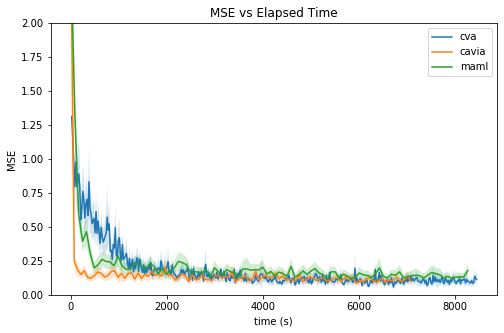

In [7]:
# plot of performance vs time for the 1000000 case
# plot the performance of everything
alpha = 0.2
numpoints = '100000'
for lbl in ['cva', 'cavia', 'maml']:
    x, y, s = loggers[lbl][numpoints].elapsed_time, loggers[lbl][numpoints].test_loss, loggers[lbl][numpoints].test_conf
    plt.plot(x, y, label=lbl)
    plt.fill_between(x, y+s, y-s, alpha=alpha)

plt.legend()
plt.title('MSE vs Elapsed Time')
plt.ylabel('MSE')
plt.xlabel('time (s)')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.ylim(0,2)
plt.show()

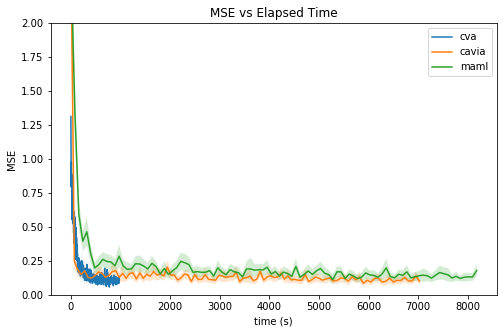

In [8]:
# plot of performance vs time for the 1000000 case
# plot the performance of everything
alpha = 0.2
numpoints = '100000'
for lbl in ['cva', 'cavia', 'maml']:
    x, y, s = loggers[lbl][numpoints].training_time, loggers[lbl][numpoints].test_loss, loggers[lbl][numpoints].test_conf
    plt.plot(x, y, label=lbl)
    plt.fill_between(x, y+s, y-s, alpha=alpha)

plt.legend()
plt.title('MSE vs Elapsed Time')
plt.ylabel('MSE')
plt.xlabel('time (s)')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.ylim(0,2)
# plt.xlim(0,1000)
plt.show()